# Predicting King's County Housing Prices

## Introduction
I will be following the Cross-Industry Standard Process for Data Mining (CRISP-DM) to predict housing prices in King's County.  

CRISP-DM is a life cycle consisting of six phases:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

## 1. Business Understanding
I will be building a multivariate regression on King's County house sale prices, with an ultimate goal of predicting house sale price as accurately as possible.  This exercise will be completed in the context of a private equity / real estate investment firm looking for diligence and valuation support.  

Identifying features of a home that are most likely to impact sale price can enable investment professionals to look for these features when evaluating homes for purchase.  Additionally, property managers looking to increase the value of an existing home may be able to leverage our findings to influence which renovations will be completed on a home first.

In the hands of investment professionals, this tool can be leveraged to validate assets are being purchased for proper valuations and used to maximize return realization. 

## 2. Data Understanding
This project uses the King's County House Sales dataset, a csv file containing the following columns:
* `id` - unique identifier for a house
* `date` - date house was sold
* `price` - sale price and the prediction target
* `bedrooms` - number of bedrooms/house
* `bathrooms` - number of bathrooms/bedrooms
* `sqft_living` - square footage of the home
* `sqft_lot` - square footage of the lot
* `floors` - total floors (levels) in the house
* `waterfront` - house which has a view to a waterfront
* `view` - has been viewed
* `condition` - how good the condition is (Overall)
* `grade` - overall grade given to the housing unit, based on King County grading system
* `sqft_above` - square footage of house apart from basement
* `sqft_basement` - square footage of the basement
* `yr_built` - year built
* `yr_renovated` - year when house was renovated
* `zipcode` - zipcode
* `lat` - latitude coordinate
* `long` - longitude coordinate
* `sqft_living15` - the square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - the square footage of the land lots of the nearest 15 neighbors

### Import Dataset
Now that we have a good understanding of the columns and features in the dataset, move forward with loading the dataset to continue further exploration of the data, including analysis of variable distributions, number of entries, median values, etc.  

In [165]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [166]:
# print available styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [245]:
# set style of visualizations
sns.set_theme() # reset default params
plt.style.use('seaborn-darkgrid')

In [246]:
# load dataset and display first rows to ensure loaded properly
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [247]:
# display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Looking at the above, we can see that our dataset occupies just over 3.5 MB of storage, and includes 20 columns and 21,597 rows.  From first glance, we can see that some columns appear to be missing some values.  All columns appear to be numerical format (either float or int), with the exception of `date` and `sqft_basement`.  

### Initial EDA - Target Variable
Now the dataset has been successfully loaded, and its overall structure has been analyzed, going to move forward with additional EDA to unpack our variables and better understand the data available to us.  

In [248]:
# separate out target and predictors
target = df['price']
predictors = df.drop('price', axis=1)

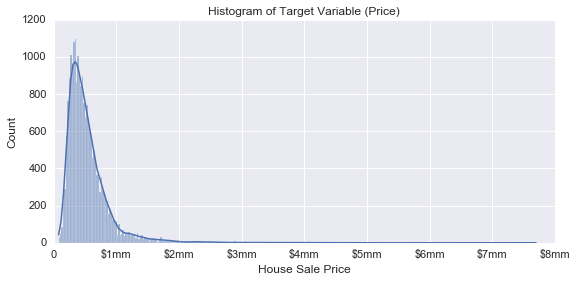

In [249]:
# display histogram of target with KDE smoothing
plt.figure(figsize=(8, 4))
ax = sns.histplot(data=target, kde=True, bins='auto')
plt.title('Histogram of Target Variable (Price)')
plt.xlabel('House Sale Price')
x_labels = ['0', '$1mm', '$2mm', '$3mm', '$4mm', '$5mm', '$6mm', '$7mm', '$8mm']
ax.set(xticks=np.linspace(0, 8000000, 9), xticklabels=(x_labels))
plt.show()

Reviewing the distribution of the target variable, `price`, we can see the majority of houses seem to fall below $2 million.  There is a significant right skew, with a number of outliers likely present with higher house sale prices.  Looking at additional summary stats will give more information on the target variable.

In [250]:
# print summary statistics and round to 2 decimals
print(f'Minimum House Sale Price: {round(target.min(), 2)}')
print(f'Maximum House Sale Price: {round(target.max(), 2)}')
print(f'Median House Sale Price: {round(target.median(), 2)}')
print(f'Mean House Sale Price: {round(target.mean(), 2)}')
print(f'House Sale Price STD: {round(target.std(), 2)}')
print(f'House Sale Price Q1: {round(target.quantile(0.25), 2)}')
print(f'House Sale Price Q3: {round(target.quantile(0.75), 2)}')

Minimum House Sale Price: 78000.0
Maximum House Sale Price: 7700000.0
Median House Sale Price: 450000.0
Mean House Sale Price: 540296.57
House Sale Price STD: 367368.14
House Sale Price Q1: 322000.0
House Sale Price Q3: 645000.0


There is quite a bit of range in our target variable, with the lowest house value coming in at \\$78k and the highest house value coming in at \\$7.7m.  The presence of outliers is evident, especially when comparing the median sale price of \\$450k with the mean sale price of \\$540k.  Standard deviation is \\$367k.  

25% percent of houses were \\$322k and less.  75% of houses were \\$645k and less.

We have a good sense of the target variable and how the majority of houses in King's County shake out in terms of sale price.  Move forward with exploring predictors and other features. 

### Initial EDA - Predictors
Start by plotting a histogram and KDE plot for each predictor to get a sense of the distributions.  Similar to the target variable above, move forward with printing summary stats as well. 

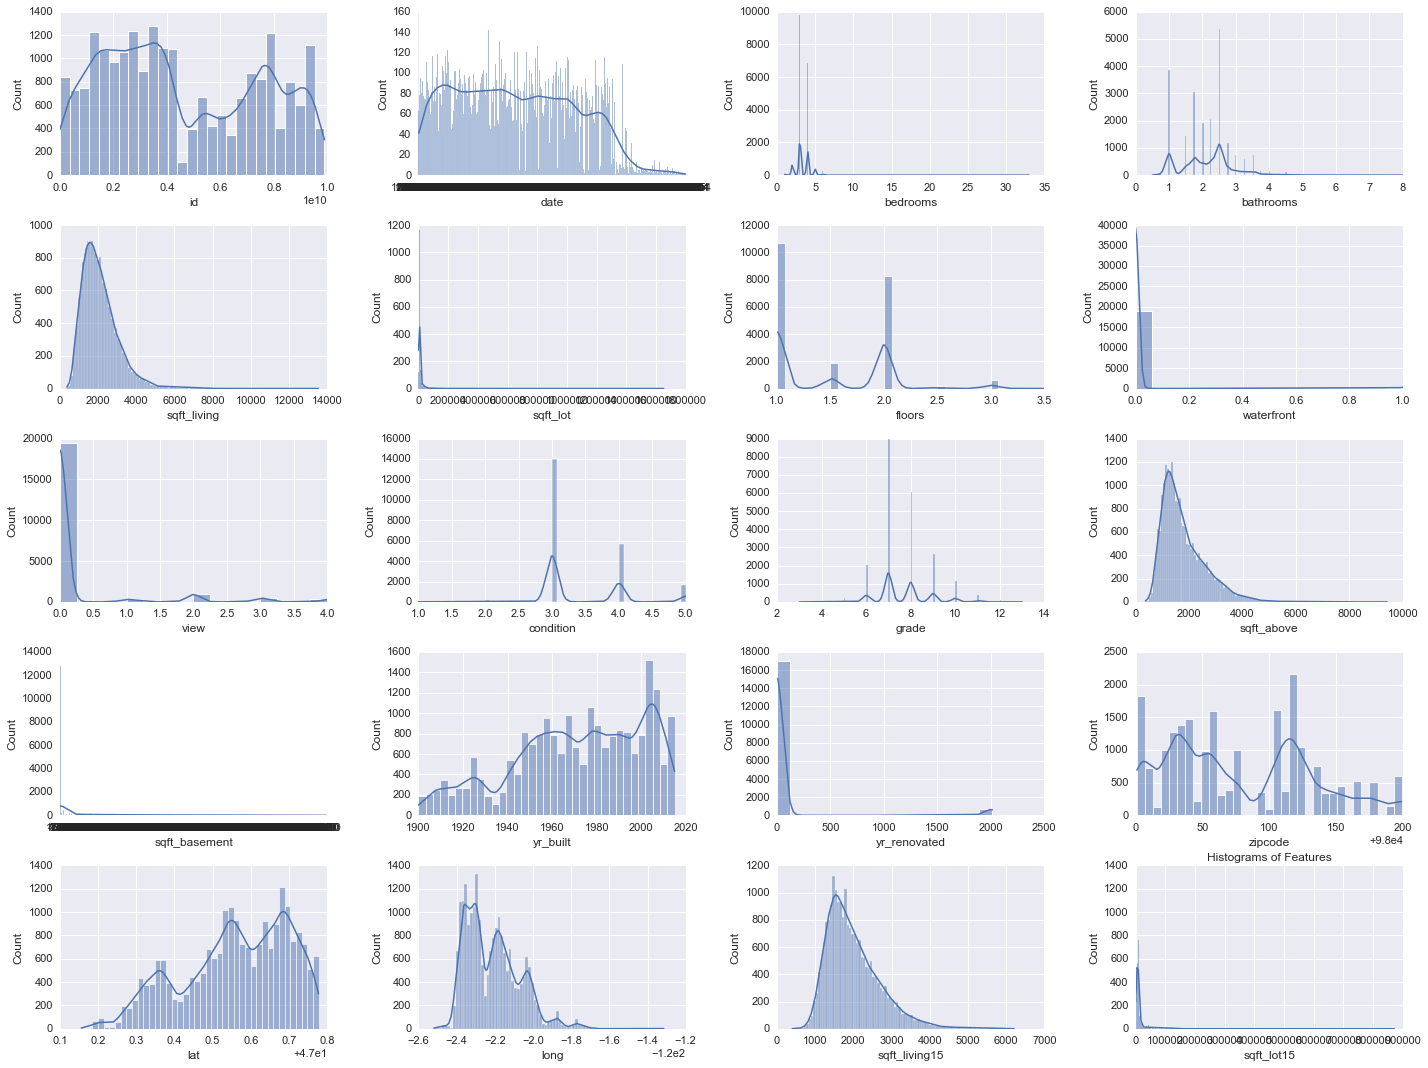

In [251]:
# set up subplots for a total of 20 plots
fig, axes = plt.subplots(nrows = 5, ncols=4, figsize=(20, 15))
for ax, feature in zip(axes.flatten(), predictors.columns):
    sns.histplot(data=predictors[feature], kde=True, ax=ax, bins='auto')
plt.tight_layout()
plt.title('Histograms of Features')
plt.show()

This gives us a high-level view of our predictors and how they roughly are distributed. While this visualization is helpful for most variables, there are some where the data is either too zoomed out or there were some issues when pulling in x-axis values.  Replot histograms of select variables to fix plotting issues and help further analyze distributions.

Observations:
* `id`: scale is likely skewing results, further exploration is necessary, but this column will likely be dropped as it is just a unique identifier. 
* `date`: x-axis is unreadable, but looks like there is a drop off in data of houses sold recently if data is aligned by time as presented. 
* `bedrooms`: Majority seeem to fall between 1 and 5. Likely outliers with higher values. 
* `bathrooms`: Majority fall between 1 and 4, with some outliers above 4.  
* `sqft_living`: Unimodal, with the majority of values falling between 0 and 5000 sqft. Right skew is present. 
* `sqft_lot`: Hard to interpret from this view, will benefit from a replot
* `floors`: Spikes at 1 and 2 floors, with smaller spikes at 1.5 and 3.0. 
* `waterfront`: Majority seem to have 0 values, corresponding with not having waterfront views.
* `view`: The majority have been viewed 0 times, with slight bumps at 2.0 and 3.0 views. 
* `condition`: Majority of KC houses appear to have condition ratings of 3.0, with a large number of houses also receiving 4.0 and 5.0 condition ratings. 
* `grade`: Majority of KC houses appear to have grades between 6 and 10. 
* `sqft_above`: Unimodal around 2000 sqft with right skew. 
* `sqft_basement`: Large number of 0 values, hard to interpret axis from this view. 
* `yr_built`: The majority of houses in the dataset appear to have been built from 2000 onward, with the oldest house represented being built in 1990.  
* `yr_renovated`: Large number of 0 values and a bump of values around 2000.  May have been a trend of renovations around 2000.  
* `zipcode`: 
* `lat`:
* `long`:
* `sqft_living15`:
* `sqft_lot15`:

In [ ]:
# loop through each predictor and produce full-sized histogram
